# Import Required Librareis 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Reading CSV file

In [2]:
data= pd.read_csv('auction.csv')

In [3]:
data

,auctionid,bid,bidtime,bidder,bidderrate,openbid,price,item,auction_type
0,1638893549,175.00,2.230949,schadenfreud,0.0,99.00,177.50,Cartier wristwatch,3 day auction
1,1638893549,100.00,2.600116,chuik,0.0,99.00,177.50,Cartier wristwatch,3 day auction
2,1638893549,120.00,2.600810,kiwisstuff,2.0,99.00,177.50,Cartier wristwatch,3 day auction
3,1638893549,150.00,2.601076,kiwisstuff,2.0,99.00,177.50,Cartier wristwatch,3 day auction
4,1638893549,177.50,2.909826,eli.flint@flightsafety.co,4.0,99.00,177.50,Cartier wristwatch,3 day auction
...,...,...,...,...,...,...,...,...,...
10676,8214889177,61.00,6.359155,714ark,15.0,0.01,90.01,Xbox game console,7 day auction
10677,8214889177,76.00,6.359294,rjdorman,1.0,0.01,90.01,Xbox game console,7 day auction
10678,8214889177,90.00,6.428738,baylorjeep,3.0,0.01,90.01,Xbox game console,7 day auction
10679,8214889177,88.00,6.760081,jasonjasonparis,18.0,0.01,90.01,Xbox game console,7 day auction


In [4]:
data.shape

(10681, 9)

# Basic exploration of data

## Information of data frame

In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10681 entries, 0 to 10680
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   auctionid                  10681 non-null  int64  
 1   bid                        10681 non-null  float64
 2   bidtime                    10681 non-null  float64
 3   bidder                     10665 non-null  object 
 4   bidderrate                 10670 non-null  float64
 5   openbid                    10681 non-null  float64
 6   price                      10681 non-null  float64
 7   item                       10681 non-null  object 
 8   auction_type               10681 non-null  object 
 9   profit                     10681 non-null  float64
 10  profit_percentage_openbid  10681 non-null  float64
 11  profit_percentage_price    10681 non-null  float64
 12  profitable                 10681 non-null  bool   
dtypes: bool(1), float64(8), int64(1), object(3)
me

## Summary of auction data

In [48]:
data.describe()

,auctionid,bid,bidtime,bidderrate,openbid,price,profit,profit_percentage_openbid,profit_percentage_price
count,1.068100e+04,10681.000000,10681.000000,10670.000000,10681.000000,10681.000000,10681.000000,1.068100e+04,10681.000000
mean,4.136148e+09,207.586109,3.979628,31.936739,52.246256,335.043589,282.797333,4.644678e+05,84.227063
std,2.489918e+09,323.037396,2.353386,120.594074,168.453245,433.566009,379.474237,1.178731e+06,25.170621
min,1.638844e+09,0.010000,0.000567,-4.000000,0.010000,26.000000,0.000000,0.000000e+00,0.000000
25%,3.015329e+09,72.000000,1.949931,1.000000,1.000000,186.510000,117.000000,3.300000e+02,76.744186
50%,3.020526e+09,140.000000,4.140833,5.000000,4.990000,228.490000,214.390000,5.005105e+03,98.041176
75%,8.212136e+09,210.000000,6.448060,21.000000,50.000000,255.000000,244.990000,3.739900e+04,99.733326
max,8.215611e+09,5400.000000,6.999990,3140.000000,5000.000000,5400.000000,3102.000000,1.599990e+07,99.999375


## Checking for missing values

In [49]:
data.isnull().sum()

auctionid                     0
bid                           0
bidtime                       0
bidder                       16
bidderrate                   11
openbid                       0
price                         0
item                          0
auction_type                  0
profit                        0
profit_percentage_openbid     0
profit_percentage_price       0
profitable                    0
dtype: int64

## Check for any duplicate value

In [50]:
dupl=data.duplicated().sum()
print(f"Duplicate data is {dupl}")

Duplicate data is 0


# A. Highest and Lowest bids

In [15]:
max_bid_index = data['bid'].idxmax()
max_bid_value = data.loc[max_bid_index, 'bid']
max_bid_item_name = data.loc[max_bid_index, 'item']
print("Maximum Bid Amount Value:", max_bid_value)
print("Item Name for Maximum Bid:", max_bid_item_name)


min_bid_index = data['bid'].idxmin()
min_bid_value = data.loc[min_bid_index, 'bid']
min_bid_item_name = data.loc[min_bid_index, 'item']
print("Minimum Bid Amount Value:", min_bid_value)
print("Item Name for Minimum Bid:", min_bid_item_name)

Maximum Bid Amount Value: 5400.0
Item Name for Maximum Bid: Cartier wristwatch
Minimum Bid Amount Value: 0.01
Item Name for Minimum Bid: Palm Pilot M515 PDA


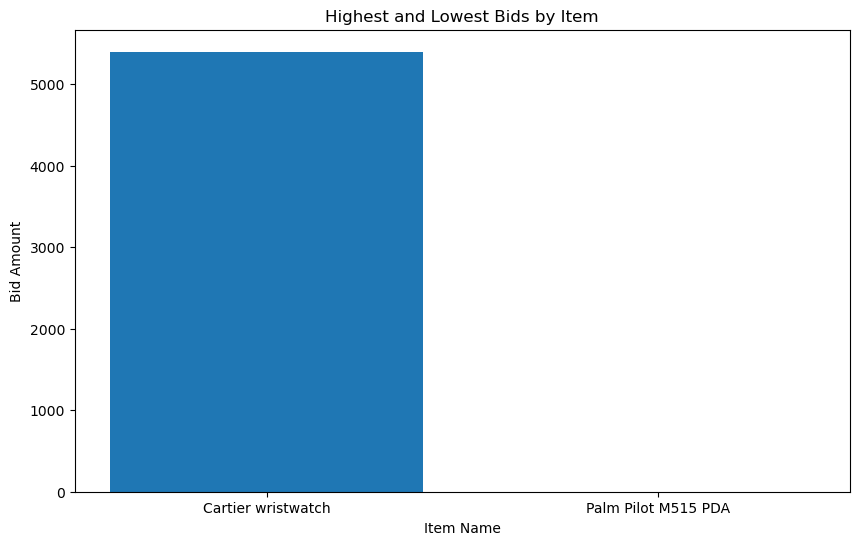

In [41]:
highest_lowest_bids = data.loc[[data['bid'].idxmax(), data['bid'].idxmin()], ['bid', 'item']]
plt.figure(figsize=(10, 6))
plt.bar(highest_lowest_bids['item'], highest_lowest_bids['bid'])
plt.title('Highest and Lowest Bids by Item')
plt.xlabel('Item Name')
plt.ylabel('Bid Amount')
plt.show()


## Average Bid amount on items 

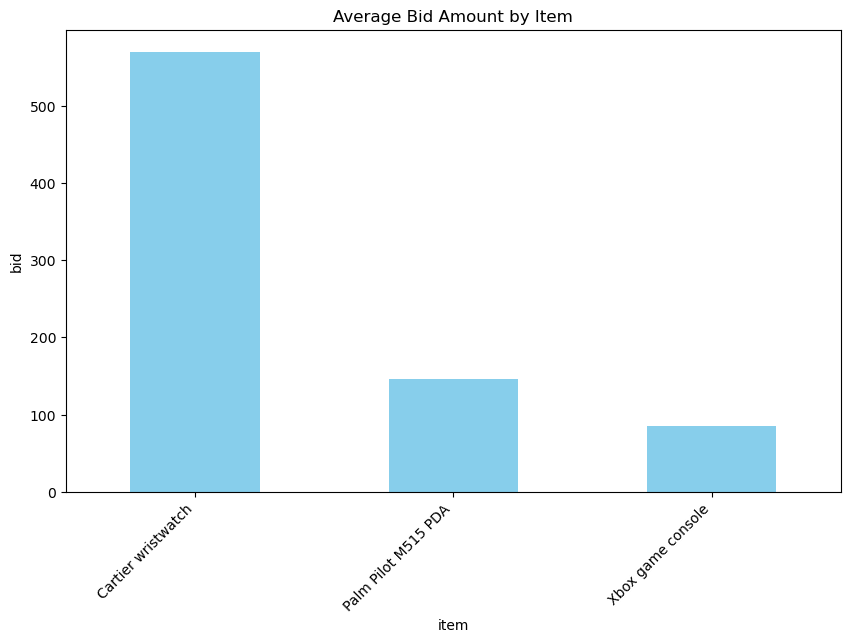

In [52]:
item_bid_means = data.groupby('item')['bid'].mean()


plt.figure(figsize=(10, 6))
item_bid_means.plot(kind='bar', color='skyblue')
plt.title('Average Bid Amount by Item')
plt.xlabel('item')
plt.ylabel('bid')
plt.xticks(rotation=45, ha='right')
plt.show()

# B. Profitable auction

## 1. Seller's Perspective:
A seller considers an auction profitable if the final price (price) is higher than the initial or open bid (openbid).
## 2. Buyer's Perspective:
A buyer considers an auction profitable if they win the bid and acquire the item for a price lower than its perceived or actual value.

In [19]:

data['profit'] = data['price'] - data['openbid']

profitable_seller = data[data['profit'] > 0]

profitable_buyer = data[data['bid'] == data['price']]

print("Profitable Auctions from Seller's Perspective:")
print(profitable_seller)

print("\nProfitable Auctions from Buyer's Perspective:")
print(profitable_buyer)

Profitable Auctions from Seller's Perspective:
        auctionid     bid   bidtime                     bidder  bidderrate  \
0      1638893549  175.00  2.230949               schadenfreud         0.0   
1      1638893549  100.00  2.600116                      chuik         0.0   
2      1638893549  120.00  2.600810                 kiwisstuff         2.0   
3      1638893549  150.00  2.601076                 kiwisstuff         2.0   
4      1638893549  177.50  2.909826  eli.flint@flightsafety.co         4.0   
...           ...     ...       ...                        ...         ...   
10676  8214889177   61.00  6.359155                     714ark        15.0   
10677  8214889177   76.00  6.359294                   rjdorman         1.0   
10678  8214889177   90.00  6.428738                 baylorjeep         3.0   
10679  8214889177   88.00  6.760081            jasonjasonparis        18.0   
10680  8214889177   90.01  6.988831                    gpgtpse       268.0   

       openbid  

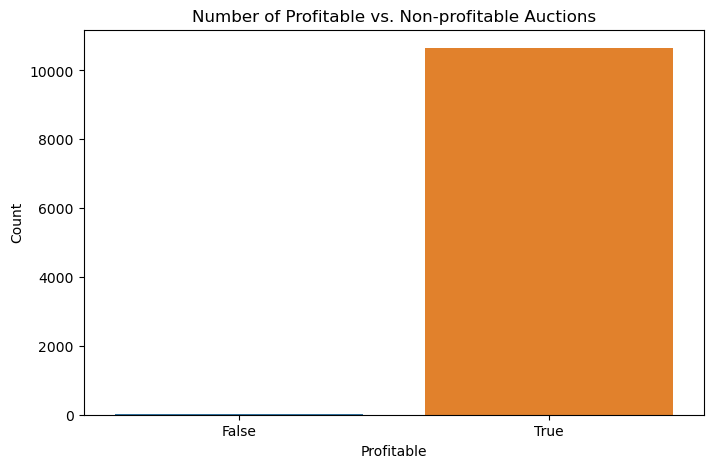

In [37]:
data['profitable'] = data['profit'] > 0

plt.figure(figsize=(8, 5))
sns.countplot(x='profitable', data=data)
plt.title('Number of Profitable vs. Non-profitable Auctions')
plt.xlabel('Profitable')
plt.ylabel('Count')
plt.show()


## B.1 Profit by percentage

In [28]:
data['profit'] = data['price'] - data['openbid']

data['profit_percentage_openbid'] = (data['profit'] / data['openbid']) * 100

data['profit_percentage_price'] = (data['profit'] / data['price']) * 100

item_profit_percentage = data.groupby('item')['profit_percentage_openbid'].sum()

most_profitable_seller_item = item_profit_percentage.idxmax()
max_profit_seller = item_profit_percentage.max()
print(f"Most Profitable Item for Seller (Percentage of Open Bid): {most_profitable_seller_item}, Profit Percentage: {max_profit_seller}%")

least_profitable_seller_item = item_profit_percentage.idxmin()
min_profit_seller = item_profit_percentage.min()
print(f"Least Profitable Item for Seller (Percentage of Open Bid): {least_profitable_seller_item}, Profit Percentage: {min_profit_seller}%")

most_profitable_buyer_item = data.loc[data['profit_percentage_price'].idxmax(), 'item']
max_profit_buyer = data['profit_percentage_price'].max()
print(f"\nMost Profitable Item for Buyer (Percentage of Final Price): {most_profitable_buyer_item}, Profit Percentage: {max_profit_buyer}%")

least_profitable_buyer_item = data.loc[data['profit_percentage_price'].idxmin(), 'item']
min_profit_buyer = data['profit_percentage_price'].min()
print(f"Least Profitable Item for Buyer (Percentage of Final Price): {least_profitable_buyer_item}, Profit Percentage: {min_profit_buyer}%")


Most Profitable Item for Seller (Percentage of Open Bid): Palm Pilot M515 PDA, Profit Percentage: 3941875701.662385%
Least Profitable Item for Seller (Percentage of Open Bid): Xbox game console, Profit Percentage: 469951984.7493538%

Most Profitable Item for Buyer (Percentage of Final Price): Cartier wristwatch, Profit Percentage: 99.999375%
Least Profitable Item for Buyer (Percentage of Final Price): Palm Pilot M515 PDA, Profit Percentage: 0.0%


## B.2 Distribution of profitable auction by item

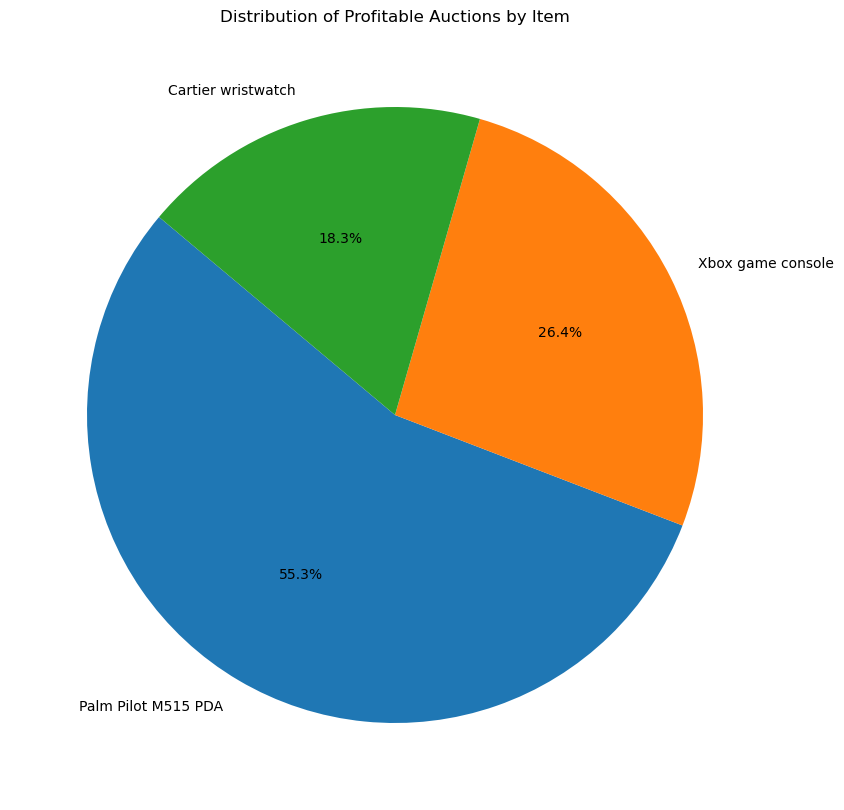

In [40]:
data['profit'] = data['price'] - data['openbid']

data['profitable'] = data['profit'] > 0
profitable_auctions = data[data['profitable']]

profitable_items = profitable_auctions['item'].value_counts()

plt.figure(figsize=(10, 10))
plt.pie(profitable_items, labels=profitable_items.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Profitable Auctions by Item')
plt.show()


# C. Analyzing the input varriables from buyer and seller perspective

## 1. Buyer's Perspective:
Analyze bidding behavior, considering variables like 'bid', 'bidtime', 'bidrate', etc.

Calculate the number of bids made by each buyer (assuming each unique combination of 'bid', 'bidtime', etc., represents a unique buyer).

In [44]:
buyer_behavior = data.groupby(['bid', 'bidtime'])['bid'].count().reset_index(name='bid_count')
print("Buyer Behavior:")
print(buyer_behavior)




Buyer Behavior:
           bid   bidtime  bid_count
0         0.01  0.027384          1
1         0.01  0.063180          1
2         0.01  0.092510          1
3         0.01  0.185104          1
4         0.01  0.485130          1
...        ...       ...        ...
10671  3800.00  6.999387          1
10672  5100.00  6.925521          1
10673  5200.00  6.291875          1
10674  5300.00  6.926470          1
10675  5400.00  6.933403          1

[10676 rows x 3 columns]


Investigate the distribution of bid amounts made by buyers.

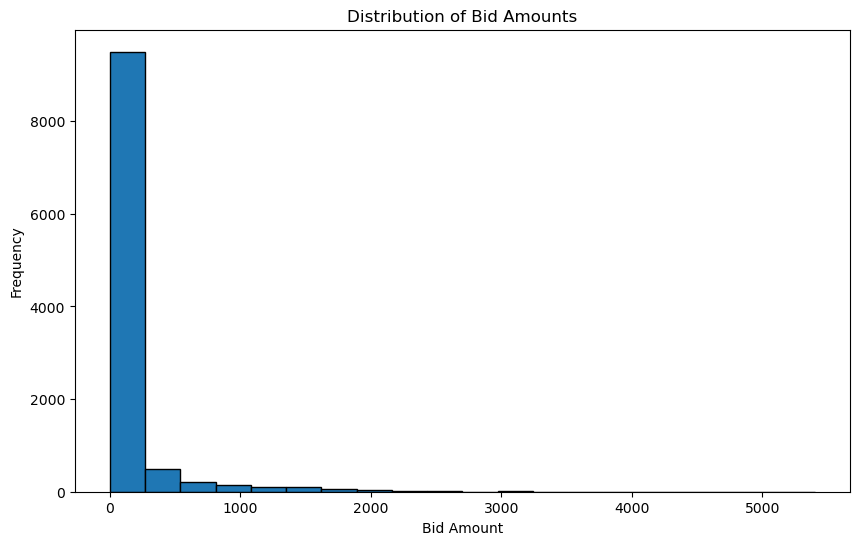

In [43]:
plt.figure(figsize=(10, 6))
plt.hist(data['bid'], bins=20, edgecolor='black')
plt.title('Distribution of Bid Amounts')
plt.xlabel('Bid Amount')
plt.ylabel('Frequency')
plt.show()

## 2. Seller's Perspective:
Analyze the behavior of sellers by considering variables such as 'openbid', 'price', and 'profit'.

In [46]:
data['profit'] = data['price'] - data['openbid']

seller_profit_analysis = data.groupby(['openbid', 'price'])['profit'].agg(['sum', 'mean', 'max', 'min']).reset_index()
print("\nSeller Profit Analysis:")
print(seller_profit_analysis)





Seller Profit Analysis:
     openbid    price      sum    mean     max     min
0       0.01    86.00  1375.84   85.99   85.99   85.99
1       0.01    90.01  1890.00   90.00   90.00   90.00
2       0.01   100.00  3399.66   99.99   99.99   99.99
3       0.01   106.00  2437.77  105.99  105.99  105.99
4       0.01   106.50  4046.62  106.49  106.49  106.49
..       ...      ...      ...     ...     ...     ...
525  1500.00  1525.00    50.00   25.00   25.00   25.00
526  1695.00  1720.00    50.00   25.00   25.00   25.00
527  1699.00  1799.00   500.00  100.00  100.00  100.00
528  2350.00  2425.00   300.00   75.00   75.00   75.00
529  5000.00  5400.00  1600.00  400.00  400.00  400.00

[530 rows x 6 columns]


Investigate the distribution of open bids set by sellers.

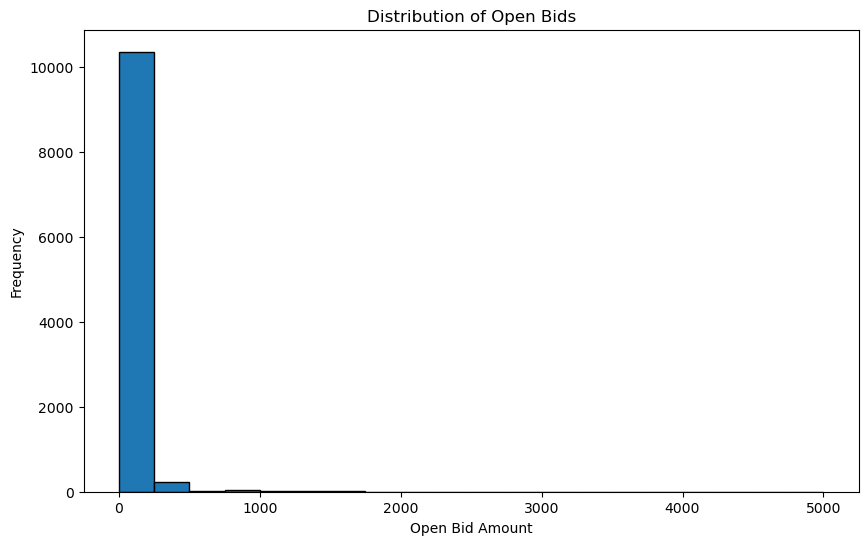

In [45]:
plt.figure(figsize=(10, 6))
plt.hist(data['openbid'], bins=20, edgecolor='black')
plt.title('Distribution of Open Bids')
plt.xlabel('Open Bid Amount')
plt.ylabel('Frequency')
plt.show()
